# Problem 2: Geospatial location of COVID19 confirmed cases

**This is intended for educational purposes and is not intended as a realistic analysis of the COVID-19 virus confirmed cases.**



### Part a (10 points): Get the dataset and extract mainland US cases

- Go to your host operating system (no git is installed in CompPhys docker, on purpose)
- Find the directory you cloned the midterm into. 
- Execute: `git clone https://github.com/CSSEGISandData/COVID-19.git`. **If successful, you should see the CSV file in the next cell.**
- Extract the data for the mainland US (latitude between 25 and 50 degrees, longitude between -130 and -70 degrees) into a numpy array that has (latitude, longitude, number of confirmed cases), with separate rows for each of the entries in the text file. Extract the number of confirmed cases that occurred on 3/18/20 (18-March-2020). 

Hint: Using `genfromtxt` will not work. You will have to extract this by hand. The problem is that there are quotation marks in various entries (either in the country or the state) that you will have to work around. 



In [1]:
# ! head -n 4 tCOVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv
# ! head -n 4 COVID-19/archived_data/archived_time_series/time_series_19-covid-Confirmed_archived_0325.csv
! head -n 4 time_series_19-covid-Confirmed.csv

In [2]:
import sys
import numpy as np
import math
import copy
import matplotlib.pyplot as plt

In [3]:
# Make the plots a bit bigger to see
# NOTE: Must be done in a separate cell
plt.rcParams['figure.dpi'] = 100

### Read into numpy array

In [4]:
# s = 'tCOVID-19/archived_data/archived_time_series/time_series_19-covid-Confirmed_archived_0325.csv'
# s = 'tCOVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
s = 'time_series_19-covid-Confirmed.csv'

#### Solution: 

In [5]:
us_coords = np.array([[25.0,-130.0],[50.0,-70.0]])

In [6]:
import csv

date_to_use = '3/18/20'
# date_to_use = '3/22/20'

states = []
countries = []
lats = []
lons = []
nconfirmed = []
reader = csv.reader(open(s), delimiter=',')
ir = 0
for r in reader:
    if ir == 0 : 
        index_to_use = r.index(date_to_use)
    else:
        state,country,lat,lon = r[0:4]
        states.append(state)
        countries.append(country)
        lats.append(float(lat))
        lons.append(float(lon))
        nconfirmed .append( float(r[index_to_use]) )
    ir += 1
data = np.array( list(zip(lats,lons,nconfirmed) ) )

# Your selection goes here:
data1 = data[np.where((data[:,0] > us_coords[0,0]) * (data[:,1] > us_coords[0,1]))]
US_data = data1[np.where((data1[:,0] < us_coords[1,0]) * (data1[:,1] < us_coords[1,1]))]
US_Data = US_data[:,0:2]
print(np.shape(US_Data))
npoints = np.shape(US_Data)[0]
print(npoints)

(242, 2)
242


### Plot the mainland US data

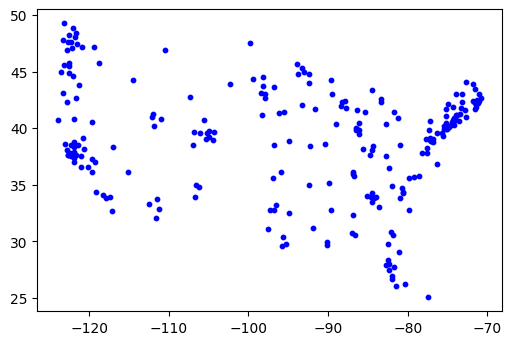

In [7]:
plt.scatter( US_Data[:,1], US_Data[:,0], c = 'b', s = 10.0)
plt.show()

## Part b (15 points) : Make Voronoi diagram

- Make a Voronoi diagram of the data above.
- Assume there are 10 Voronoi cells. Assign each a different color.
- Initialize them to 10 randomly assigned points in the data sample. 
- Compute the centroids that minimize the $k$-means distance to the data points.
- Plot the centroids of the data in black circles.
- Plot the separate individual points by centroid color.


You should adapt the `kmeans.ipynb` file for this. 

### Initialize centroids

In [8]:
ncentroids = 10
eps = 0.001
# centroids = US_Data[np.random.randint(US_Data.shape[0], size=ncentroids), :]
centroids = np.stack((np.random.uniform(25.0,50.0,ncentroids), np.random.uniform(-120.0,-70.0,ncentroids)), axis=-1)
deltamax = 10000.

ii = np.arange(npoints)
jj = np.arange(ncentroids)
i,j = np.meshgrid(ii,jj)

print("Initial centroid positions :")
print(centroids)
print(np.shape(centroids))


Initial centroid positions :
[[  29.65962149  -77.45883231]
 [  40.29259566 -100.68205551]
 [  41.80781418  -73.87458113]
 [  45.91504492  -98.81153363]
 [  28.65119226  -94.29678957]
 [  37.99742357  -90.61143737]
 [  41.93679077  -84.23581091]
 [  39.26624198 -100.97127381]
 [  35.03943593  -72.54507681]
 [  28.47893123 -102.48686776]]
(10, 2)


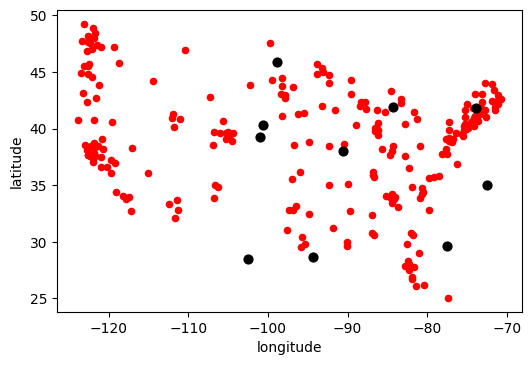

In [9]:
plt.scatter( US_Data[:,1], US_Data[:,0], c = 'r', s=20)
plt.scatter( centroids[:,1], centroids[:,0], c='k', marker="o", s=40)
plt.xlabel("longitude")
plt.ylabel("latitude")
# plt.savefig('p2_f1.pdf')
plt.show()

In [10]:
while deltamax > eps: 
    print("iterating: ", deltamax  ) 
    old_centroids = copy.copy(centroids)
    deltavals = np.sqrt(( US_Data[i] - centroids[j] )**2)
    distances = np.linalg.norm( deltavals, axis=2 )
    closest_centroid = np.argmin(distances, axis=0)
    for k in range(centroids.shape[0]):
        if US_Data[closest_centroid==k].shape[0] != 0:
            centroids[k,:] = np.array([US_Data[closest_centroid==k].mean(axis=0)])
        else : 
            centroids[k,:] = US_Data[np.random.randint(US_Data.shape[0]), :]
#     centroids = np.array([US_Data[closest_centroid==k].mean(axis=0) for k in range(centroids.shape[0])])
    deltamax = np.max( old_centroids - centroids)

iterating:  10000.0
iterating:  15.317397889416384
iterating:  4.672277499999964
iterating:  1.6369464285714486
iterating:  0.9886541666666737
iterating:  0.8609529411764711
iterating:  0.16514705882353553


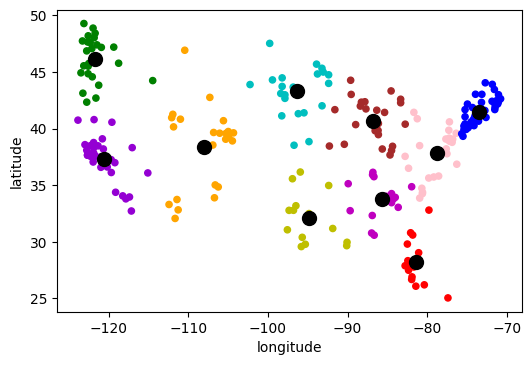

In [11]:
colors = np.array(['r', 'g', 'b', 'c','y', 'm', 'brown','darkviolet','pink','orange'])
plt.scatter( US_Data[:,1], US_Data[:,0], c = colors[closest_centroid],s = 20.0)
plt.scatter( centroids[:,1], centroids[:,0], c = 'k', s=100, marker='o')
plt.xlabel("longitude")
plt.ylabel("latitude")
# plt.savefig('p2_f2.pdf')
plt.show()

In [12]:
print("Final Centroid positions :")
print(centroids)

Final Centroid positions :
[[  28.21934     -81.45722667]
 [  46.186968   -121.78874   ]
 [  41.43658333  -73.50425714]
 [  43.29255714  -96.30260952]
 [  32.10505714  -94.79804286]
 [  33.7863      -85.73155294]
 [  40.70033077  -86.81543846]
 [  37.3408375  -120.6346    ]
 [  37.83281852  -78.7695037 ]
 [  38.3989087  -108.07830435]]
